# Encoding
Degiskenlerin temsil sekillerinin degistirilmesi

## Label Encoding & Binary Encoding
* Label : Ornegin bir kategorik degiskenin siniflari labellaridir ('Male','Female'))
* Buradaki labellari yeniden kodlamak demek Label Encoding ornegin 'Male'=0 'Female'=1

Eger bir kategorik degiskenin 2 sinifi varsa bu 1 0 olarak kodlanirsa bu durumda buna *Binary Encoding* denir

Elimizdeki bir kategorik degisken Label Encoder a sokulursa ve 2 den fazla sinifi varsa bu durumda *Label Encoder* yapilmis olur

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt
import missingno as msno
from datetime import date
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler
pd.set_option('display.max_columns', None)

In [2]:
def load():
    df = pd.read_csv("/Users/huseyinefkanalp/Desktop/DataScience/Miuul/FeatureEngineering/datasets/titanic.csv")
    return df
def load_application_train():
    data = pd.read_csv("/Users/huseyinefkanalp/Desktop/DataScience/Miuul/FeatureEngineering/datasets/application_train.csv")
    return data

In [3]:
df = load()
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df['Sex'].head()

0      male
1    female
2    female
3    female
4      male
Name: Sex, dtype: object

In [5]:
le = LabelEncoder()

In [6]:
# Sex degiskenini 0 ve 1 e donusturduk
le.fit_transform(df['Sex'])[0:5]

array([1, 0, 0, 0, 1])

In [7]:
# Eger 1 in neyi 0 in neyi temsil ettigini unutursak
le.inverse_transform([0,1])

array(['female', 'male'], dtype=object)

In [8]:
# Label Encoder i fonksiyonlastiralim
def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe

In [9]:
df = load()

In [10]:
# 2 sinifli kategorik degiskenleri secmek
binary_cols = [col for col in df.columns if df[col].nunique() == 2 and df[col].dtype not in [int,float]]

In [11]:
binary_cols

['Sex']

In [12]:
for col in binary_cols:
    label_encoder(df, col)

In [13]:
# Assagida gorundugu uzre cinsiyet degiskeni encode edilmis oldu
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


In [14]:
# Daha buyuk bir veri seti ile calisalim
df = load_application_train()
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [15]:
def find_binary_cols(df):
    binary_cols = [col for col in df.columns if df[col].nunique()==2 and df[col].dtype not in [int, float]]
    return binary_cols

In [16]:
train_binary_cols = find_binary_cols(df)
train_binary_cols

['NAME_CONTRACT_TYPE',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'EMERGENCYSTATE_MODE']

In [17]:
df[train_binary_cols].head()

,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,EMERGENCYSTATE_MODE
0,Cash loans,N,Y,No
1,Cash loans,N,N,No
2,Revolving loans,Y,Y,NaN
3,Cash loans,N,Y,NaN
4,Cash loans,N,Y,NaN


In [18]:
for col in train_binary_cols:
    label_encoder(df, col)

In [19]:
# burada bir problem oldugu gorunuyor emer_mod da nan degerler de encode edilmis
df[train_binary_cols].head()

,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,EMERGENCYSTATE_MODE
0,0,0,1,0
1,0,0,0,0
2,1,1,1,2
3,0,0,1,2
4,0,0,1,2


## One-Hot Encoding
Degiskenimizde 2 den fazla sinif olsun ve bu siniflar arasinda herhangi bir seviye farki olmasin. Ben bu siniflari oyle bir temsil etmeliyim ki bir olcum problemini yaratmayim cunku siniflar arasinda herhangi bir fark yok durduk yere kendim buraya bir fark koymayayim.

Iste bunun icin her bir sinifi degiskenlere (Sutunlara) cevirmeliyiz. Bu degiskenlere dummy degiskenler denir. Ilk sinifi drop etmemiz gerekir

										Bu Halden
| Team        |
| ----------- |
| Gs   |       
| FB   |       
| BJK  |       
| TS   |
									Bu Hale Getiriyoruz
| Gs  | FB   | BJK  | TS   |
| :---|:----:|:---: | ---: |
| 1   | 0    | 0    | 0    |
| 0   | 1    | 0    | 0    |
| 0   | 0    | 1    | 0    |
| 0   | 0    | 0    | 1    |

In [20]:
df = load()
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [21]:
# Kac sinif var Ona bakiyoruz 3 ve bu siniflarin arasinda fark yok
# Siniflar arasinda herhangi bir fark olmadigindan label encoder a sokarsak iyi sonuc almayiz
# O yuzden One-Hot Encoder yapmamiz gerekiyor
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [22]:
# One-hot Encoding icin pd.get_dummies kullanilir 
# gorundugu uzre her bir sinif icin sutunlar olusturdu
# !! Ancak dummy degisken tuzagina dusmemek icin ilk degiskeni droplamaliyiz
pd.get_dummies(df, columns=['Embarked']).head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,0,0,1


In [23]:
# !! Ancak dummy degisken tuzagina dusmemek icin ilk degiskeni droplamaliyiz
# bunun icin dummies in drop_first argumanini True yapmaliyiz
# Ve gorundugu uzre ilk sinif olan C sinifi gitti
pd.get_dummies(df,columns=['Embarked'], drop_first= True).head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,0,1


In [24]:
# Eger eksik degerler icin de bir degisken olustursun istersek
# dummy_na parametresini de True yapmamiz gerekiyor
# Gorundugu uzre nan degerler icin de sutun olustu
pd.get_dummies(df, columns=['Embarked'], dummy_na=True).head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S,Embarked_nan
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,1,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,0,0,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,0,0,1,0


In [25]:
# Get_dummies i kullanarak hem binary encoding islemini hem de One-hot yapapabiliriz
# Gorundugu uzre hem 2 sinifi olan Sex degiskenini encode ettik
# hem de 3 tane farksiz sinifi olan Embarked degiskenini encode ettik
pd.get_dummies(df, columns=['Embarked','Sex'], drop_first=True).head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_Q,Embarked_S,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,0,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,0,1,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,0,1,1


In [26]:
def one_hot_encoder(df,categorical_cols, drop_first=True):
    dataframe = pd.get_dummies(df, columns=categorical_cols, drop_first=drop_first)
    return dataframe

In [27]:
df = load()

In [28]:
# 2 den az sinifi ve 10 dan fazla sinifi bulunan kategorik degiskenleri disarda tuttuk
ohe_cols = [col for col in df.columns if 10 >= df[col].nunique() > 2]
ohe_cols

['Pclass', 'SibSp', 'Parch', 'Embarked']

In [29]:
one_hot_encoder(df, ohe_cols).head()

,PassengerId,Survived,Name,Sex,Age,Ticket,Fare,Cabin,Pclass_2,Pclass_3,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_Q,Embarked_S
0,1,0,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,1,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
4,5,0,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [30]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [34]:
def grab_col_names(df, cat_th=10, car_th=20):
    """
    Veri setindeki kategorik, numerik ve kategorik fakat kardinal değişkenlerin isimlerini verir.
    Not: Kategorik değişkenlerin içerisine numerik görünümlü kategorik değişkenler de dahildir.
    
    Parameters
    -------
    	df: dataframe
        		Değişken isimleri alınmak istenilen dataframe
        cat_th: int, optional
        		numerik fakat kategorik olan değişkenler için sınıf eşik değeri
        car_th: int, optional
        		kategorik fakat kardinal değişkenler için sınıf eşik değeri
    Returns
    ------
    	cat_cols: list
        		Kategorik değişken listesi
        num_cols: list
        		Numerik değişken listesi
        
    """
    
    # cat_cols, cat_but_car
    cat_cols = [col for col in df.columns if df[col].dtypes == "O"]
    num_but_cat = [col for col in df.columns if df[col].nunique() < cat_th and df[col].dtypes != "O"]
    cat_but_car = [col for col in df.columns if df[col].nunique() > car_th and df[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]
    
    # num_cols
    num_cols = [col for col in df.columns if df[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]
    
    print(f"Observations: {df.shape[0]}")
    print(f"Variables: {df.shape[1]}")
    print(f"cat_cols: {len(cat_cols)}")
    print(f"num_cols: {len(num_cols)}")
    print(f"cat_but_car: {len(cat_but_car)}")
    print(f"num_but_cat: {len(num_but_cat)}")
    return cat_cols, num_cols, cat_but_car

## Rare Encoding
* Rare = Nadir, az gozlemlenen
Veri setindeki bir kategorik degisiskenin siniflarindaki az degerler belirli bir esik degere gore (esik degeri kendimiz belirleriz) altinda kalan degerler belirlenir ve esik degerin altinda kalan siniflar bir araya getirilip temsil edilir.

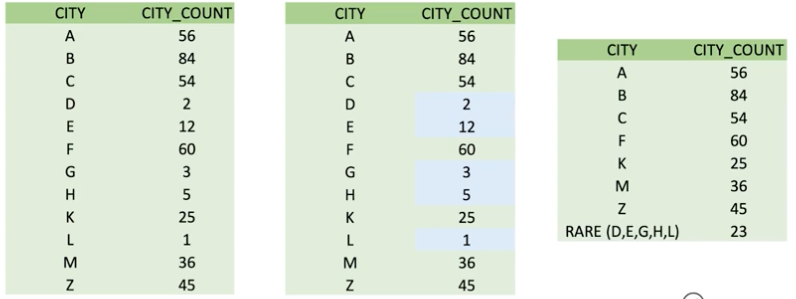

### Adim adim yapacagiz
1. Kategorik degiskenlerin azlik cokluk durumunun analiz edilmesi.
2. Rare kategoriler ile bagimli degisken arasindaki iliskinin analiz edilmesi
3. Rare encoder yazacagiz

In [33]:
df = load_application_train()
df['NAME_EDUCATION_TYPE'].value_counts()

Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: NAME_EDUCATION_TYPE, dtype: int64

In [35]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 307511
Variables: 122
cat_cols: 54
num_cols: 67
cat_but_car: 1
num_but_cat: 39


In [37]:
def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                       'Ratio': 100* dataframe[col_name].value_counts() / len(dataframe)}))
    print("##########################")
    if plot:
        sns.countplot(x=dataframe[col_name], data= dataframe)
        plt.show()

In [38]:
for col in cat_cols:
    cat_summary(df, col)

                 NAME_CONTRACT_TYPE      Ratio
Cash loans                   278232  90.478715
Revolving loans               29279   9.521285
##########################
     CODE_GENDER      Ratio
F         202448  65.834393
M         105059  34.164306
XNA            4   0.001301
##########################
   FLAG_OWN_CAR      Ratio
N        202924  65.989184
Y        104587  34.010816
##########################
   FLAG_OWN_REALTY      Ratio
Y           213312  69.367275
N            94199  30.632725
##########################
                 NAME_TYPE_SUITE      Ratio
Unaccompanied             248526  80.818572
Family                     40149  13.056118
Spouse, partner            11370   3.697429
Children                    3267   1.062401
Other_B                     1770   0.575589
Other_A                      866   0.281616
Group of people              271   0.088127
##########################
                      NAME_INCOME_TYPE      Ratio
Working                         158774 

In [39]:
# 2. Rare kategoriler ile bagimli degisken arasindaki iliskinin analiz edilmesi.

In [43]:
df.groupby('NAME_INCOME_TYPE')['TARGET'].mean()

NAME_INCOME_TYPE
Businessman             0.000000
Commercial associate    0.074843
Maternity leave         0.400000
Pensioner               0.053864
State servant           0.057550
Student                 0.000000
Unemployed              0.363636
Working                 0.095885
Name: TARGET, dtype: float64

In [45]:
# bu fonksiyona bagimli degiskeni ve kategorik degiskenleri gonderdigimizde
# ilgili kategorik degiskenin kac adet degiskeni var bunu dondurur
# sinif frekanslari sinif oranlari ve bagimli degiskene gore groupby islemi yapar
def rare_analyser(dataframe, target, cat_cols):
    for col in cat_cols:
        print(col, ":", len(dataframe[col].value_counts()))
        print(pd.DataFrame({"COUNT": dataframe[col].value_counts(),
                            "RATIO": dataframe[col].value_counts() / len(dataframe),
                            "TARGET_MEAN": dataframe.groupby(col)[target].mean()}), end="\n\n\n")

In [46]:
rare_analyser(df, "TARGET", cat_cols)

NAME_CONTRACT_TYPE : 2
                  COUNT     RATIO  TARGET_MEAN
Cash loans       278232  0.904787     0.083459
Revolving loans   29279  0.095213     0.054783


CODE_GENDER : 3
      COUNT     RATIO  TARGET_MEAN
F    202448  0.658344     0.069993
M    105059  0.341643     0.101419
XNA       4  0.000013     0.000000


FLAG_OWN_CAR : 2
    COUNT     RATIO  TARGET_MEAN
N  202924  0.659892     0.085002
Y  104587  0.340108     0.072437


FLAG_OWN_REALTY : 2
    COUNT     RATIO  TARGET_MEAN
N   94199  0.306327     0.083249
Y  213312  0.693673     0.079616


NAME_TYPE_SUITE : 7
                  COUNT     RATIO  TARGET_MEAN
Children           3267  0.010624     0.073768
Family            40149  0.130561     0.074946
Group of people     271  0.000881     0.084871
Other_A             866  0.002816     0.087760
Other_B            1770  0.005756     0.098305
Spouse, partner   11370  0.036974     0.078716
Unaccompanied    248526  0.808186     0.081830


NAME_INCOME_TYPE : 8
                  

In [49]:
def rare_encoder(df, rare_perc):
    temp_df = df.copy()
    rare_columns = [col for col in temp_df.columns if temp_df[col].dtypes == 'O'
                   and (temp_df[col].value_counts()/ len(temp_df)< rare_perc).any(axis=None)]
    
    for var in rare_columns:
        tmp = temp_df[var].value_counts()/len(temp_df)
        rare_labels = tmp[tmp<rare_perc].index
        temp_df[var]= np.where(temp_df[var].isin(rare_labels), 'Rare', temp_df[var])
    
    return temp_df
    

## Feature Scaling (Ozellik Olceklendirme)
Degiskenler arasindaki olcum fakliligini gidermek.

Kullanilacak olan modellerin, degiskenlere esit sartlar altinda yaklasmasini saglamak.

### Ornek:
Elimizde 3 adet degisken olsun. Bu degiskenler filmlere verilen puan sayisi, filmlere yapilan yorum sayisi ve ve filmlere verilen 1 ile 10 arasindaki puanlar olsun. Bu 3 degiskeni dagilimlari fakli oldugu icin ayni etkiler acisindan bir modelleme teknigine gonderememekteyiz. Bu nedenle bu 3 degisken scale edilir yani olceklendirilir.
* Tum degiskenleri esit sartlar altinda degerlendirebilmek adina olceklendirmeliyiz

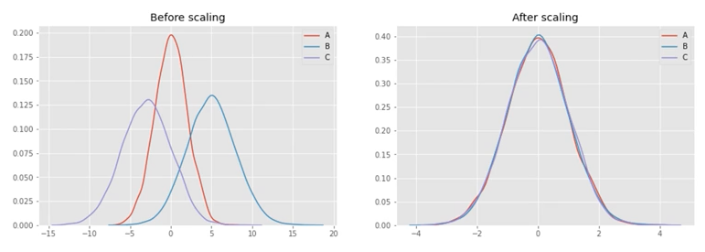